In [1]:
import sys
sys.path.insert(0, '..')
from helpers.timing import timed, compare

import numpy as np
from functools import lru_cache
from matplotlib import pyplot as plt
import random

# Динамическое программирование

Динамическое программирование в теории управления и теории вычислительных систем — способ решения сложных задач путём разбиения их на более простые подзадачи. Он применим к задачам с оптимальной подструктурой, выглядящим как набор перекрывающихся подзадач, сложность которых чуть меньше исходной. В этом случае время вычислений, по сравнению с «наивными» методами, можно значительно сократить.

Ключевая идея в динамическом программировании достаточно проста. Как правило, чтобы решить поставленную задачу, требуется решить отдельные части задачи (подзадачи), после чего объединить решения подзадач в одно общее решение. Часто многие из этих подзадач одинаковы. Подход динамического программирования состоит в том, чтобы решить каждую подзадачу только один раз, сократив тем самым количество вычислений. Это особенно полезно в случаях, когда число повторяющихся подзадач экспоненциально велико. 

- Вместо исходной задачи решается множество перекрывающихся подзадач. Ответы для подзадач хранятся в таблице.
- Динамическое программирование назад (или сверху вниз): рекурсивно от больших задач к меньшим.
- Динамическое программирование вперед (или снизу вверх): итеративно от меньших задач к большим.
- Для некоторых задач можно уменьшить используемую память, проанализировав структуру таблицы.

# Расстояние редактирования
Вычислите расстояние редактирования двух данных непустых строк длины не более $10^2$, содержащих строчные буквы латинского алфавита.

Sample Input 1:
```
ab
ab
```
Sample Output 1:
```
0
```
Sample Input 2:
```
short
ports
```
Sample Output 2:
```
3
```
### Функции

In [2]:
def edit_distance_iters(s1, s2):
    m, n = len(s1), len(s2)
    d = [[0] * (n + 1) for _ in range(m + 1)]
    for i in range(m + 1):
        d[i][0] = i
    for j in range(n + 1):
        d[0][j] = j
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            d[i][j] = min(d[i][j - 1] + 1,
                          d[i - 1][j] + 1,
                          d[i - 1][j - 1] + (s1[i - 1] != s2[j - 1]))
    return d[m][n]

In [3]:
def edit_distance_iters_V2(s1, s2):
    m, n = len(s1), len(s2)
    if m < n:
        return edit_distance_iters_V2(s2, s1)
    prev = list(range(n + 1))
    for i, ch1 in enumerate(s1, 1):
        curr = [i]  # 0(min(m, n))
        for j, ch2 in enumerate(s2, 1):
            curr.append(min(curr[-1] + 1,
                            prev[j] + 1,
                            prev[j - 1] + (ch1 != ch2)))
        prev = curr
    return prev[n]

In [4]:
def edit_distance_recurs(s1, s2):
    @lru_cache(maxsize=None)
    def d(i, j):
        if i == 0 or j == 0:
            return max(i, j)
        else:
            return min(d(i, j - 1) + 1,
                       d(i - 1, j) + 1,
                       d(i - 1, j - 1) + (s1[i - 1] != s2[j - 1]))
    return d(len(s1), len(s2))

In [5]:
def diff(char1, char2):
    return 0 if char1 == char2 else 1

### Тесты

In [6]:
def test(func_edit_distance, n_iter=10):
    assert func_edit_distance("ab", "ab") == 0
    assert func_edit_distance("short", "ports") == 3

In [7]:
func_dic = {
    'edit_distance_recurs': edit_distance_recurs,
    'edit_distance_iters': edit_distance_iters,
    'edit_distance_iters_V2': edit_distance_iters_V2
}
for name in func_dic:
    try:
        test(func_dic[name])
        print(name, 'отработал без ошибок')
    except:
        print(name, 'отработал с ошибками')       

edit_distance_recurs отработал без ошибок
edit_distance_iters отработал без ошибок
edit_distance_iters_V2 отработал без ошибок


### Тесты

In [8]:
A = 'хлеб'
B = 'пиво'
dist = edit_distance_iters(A, B)
print('Расстояние между', A, 'и', B, 'равно', dist)

Расстояние между хлеб и пиво равно 4


### Быстродействие

In [9]:
def compare_wrapper(max_size):
    alphabet = list('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
    np_alphabet = np.array(alphabet)
    words_list = []
    first_letters, second_letters = np.random.choice(np_alphabet, [2, max_size])
    for word_size in range(1, max_size):
        words = ["".join(first_letters[:word_size]), "".join(second_letters[:word_size])]
        words_list.append(words)
    compare(func_dic.values(), words_list, unpack_array=True)

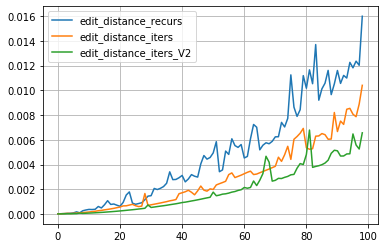

In [10]:
compare_wrapper(100)